In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# My own BM

In [2]:
k_fixer = lambda k: k if k != 499_999_999 else 500_000_000

single_core = pd.concat(
    [pd.read_csv(f"new_new_bench_results_1_500M.csv"), pd.read_csv(f"new_bench_results_1_500M.csv")])
single_core = single_core[single_core["algo"] != "SeqPermutationCopy"]
single_core["k"] = single_core["k"].apply(k_fixer)

multi_core = pd.concat(
    [pd.read_csv(f"new_new_bench_results_12_500M.csv"), pd.read_csv(f"new_bench_results_12_500M.csv")])
multi_core = multi_core[multi_core["algo"] != "SeqPermutationCopy"]
multi_core["k"] = multi_core["k"].apply(k_fixer)

hyper_core = pd.concat(
    [pd.read_csv(f"new_new_bench_results_24_500M.csv"), pd.read_csv(f"new_bench_results_24_500M.csv")])
hyper_core = hyper_core[hyper_core["algo"] != "SeqPermutationCopy"]
hyper_core["k"] = hyper_core["k"].apply(k_fixer)

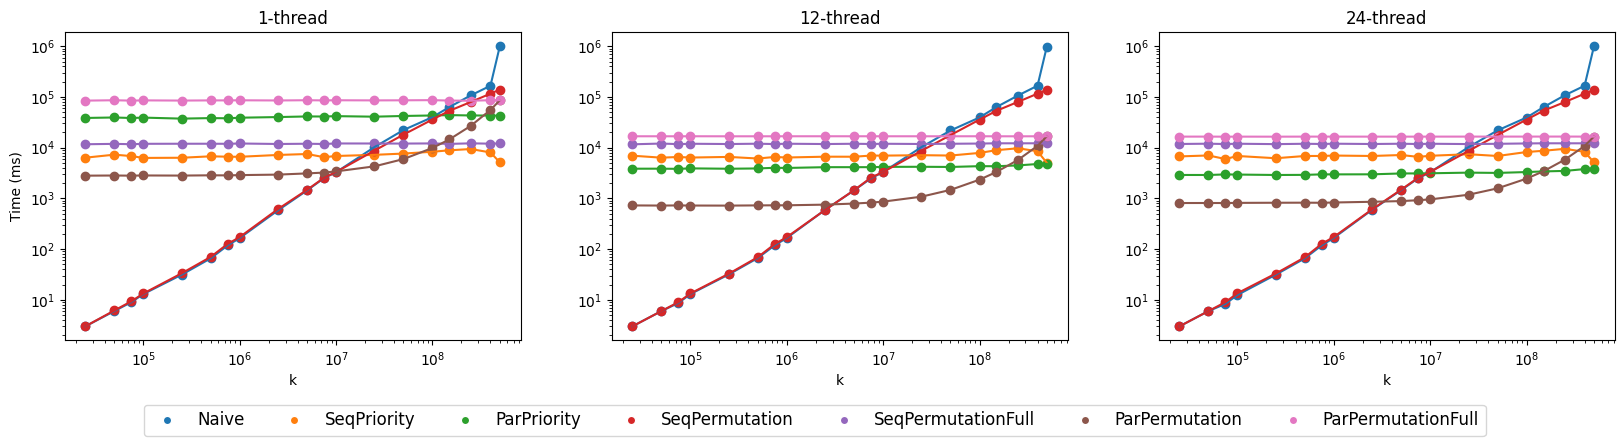

In [3]:
names = [name for name in single_core["algo"].unique()]
colors = mpl.cm.get_cmap("tab10")
colors = [colors(i) for i in range(len(names))]
custom_legends = [
    mpl.lines.Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[i], label=name)
    for i, name in enumerate(names)
]

fig = plt.figure(figsize=(20, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharey=ax1)
ax3 = fig.add_subplot(1, 3, 3, sharey=ax1)

ax1.set_title("1-thread")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylabel("Time (ms)")
ax1.set_xlabel("k")

ax2.set_title("12-thread")
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel("k")

ax3.set_title("24-thread")
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_xlabel("k")

for name, color in zip(names, colors):
    sc = single_core[single_core["algo"] == name].sort_values("k")
    mc = multi_core[multi_core["algo"] == name].sort_values("k")
    hc = hyper_core[hyper_core["algo"] == name].sort_values("k")

    x = sc["k"].unique()
    y = sc.groupby("k")["time"].mean().to_numpy()
    ax1.plot(x, y, color=color)
    ax1.scatter(x, y, color=color)

    x = mc["k"].unique()
    y = mc.groupby("k")["time"].mean().to_numpy()
    ax2.plot(x, y, color=color)
    ax2.scatter(x, y, color=color)

    x = hc["k"].unique()
    y = hc.groupby("k")["time"].mean().to_numpy()
    ax3.plot(x, y, color=color)
    ax3.scatter(x, y, color=color)

fig.legend(handles=custom_legends, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=7, fontsize="large")
plt.savefig("/Users/nawat/muic/senior/undergrad-thesis/figures/bench_plots_loglog.png", bbox_inches="tight", dpi=600)
plt.show()

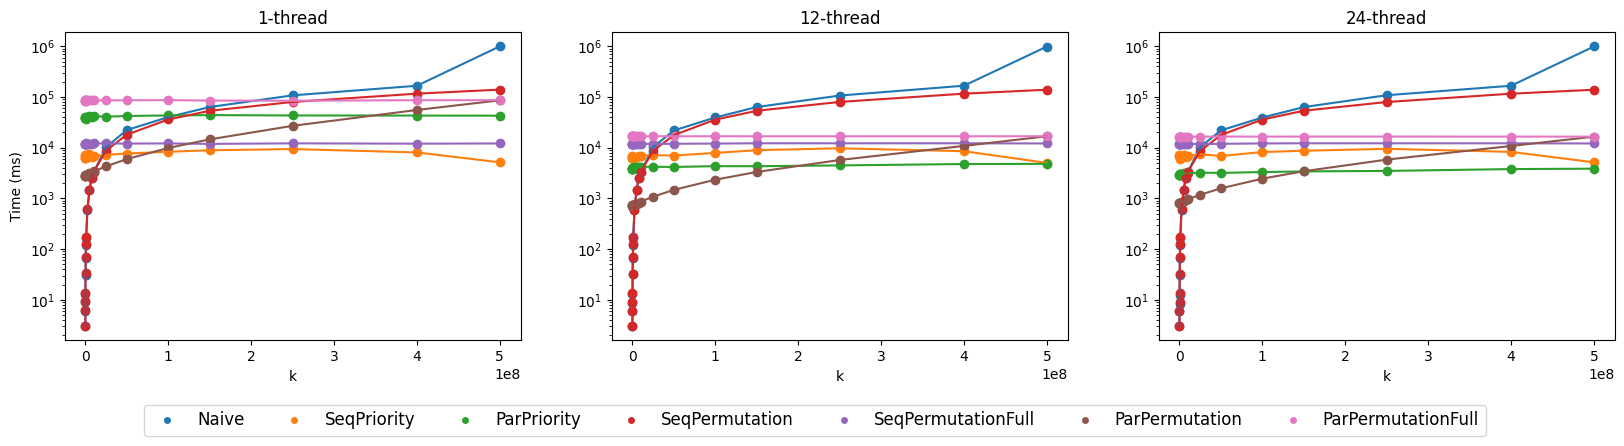

In [4]:
fig = plt.figure(figsize=(20, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharey=ax1)
ax3 = fig.add_subplot(1, 3, 3, sharey=ax1)

ax1.set_title("1-thread")
ax1.set_yscale("log")
ax1.set_ylabel("Time (ms)")
ax1.set_xlabel("k")

ax2.set_title("12-thread")
ax2.set_yscale("log")
ax2.set_xlabel("k")

ax3.set_title("24-thread")
ax3.set_yscale("log")
ax3.set_xlabel("k")

for name, color in zip(names, colors):
    sc = single_core[single_core["algo"] == name].sort_values("k")
    mc = multi_core[multi_core["algo"] == name].sort_values("k")
    hc = hyper_core[hyper_core["algo"] == name].sort_values("k")

    x = sc["k"].unique()
    y = sc.groupby("k")["time"].mean().to_numpy()
    ax1.plot(x, y, color=color)
    ax1.scatter(x, y, color=color)

    x = mc["k"].unique()
    y = mc.groupby("k")["time"].mean().to_numpy()
    ax2.plot(x, y, color=color)
    ax2.scatter(x, y, color=color)

    x = hc["k"].unique()
    y = hc.groupby("k")["time"].mean().to_numpy()
    ax3.plot(x, y, color=color)
    ax3.scatter(x, y, color=color)

fig.legend(handles=custom_legends, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=7, fontsize="large")
plt.savefig("/Users/nawat/muic/senior/undergrad-thesis/figures/bench_plots_loglin.png", bbox_inches="tight", dpi=600)
plt.show()

In [5]:
def transform_k(k):
    s = f"{k:.1e}"
    p, ex = s.split("e+")
    return "$" + str(p) + " \\times 10^{" + str(int(ex)) + "}$"


def transform_name(name):
    if name == "k":
        return "$k$"
    elif name == "algo":
        return "Algorithm"
    return name.replace("Permutation", "Perm").replace("Priority", "Prior").replace("Par", "P").replace("Seq", "S")


new_order = ["Naive", "SeqPriority", "ParPriority", "SeqPermutation", "SeqPermutationFull", "ParPermutation",
             "ParPermutationFull"]
with (open("/Users/nawat/muic/senior/undergrad-thesis/tables/single_core.tex", "w") as f):
    to_write = single_core \
        .rename(columns=transform_name) \
        .pivot_table(index="$k$", columns="Algorithm", values="time") \
        [new_order] \
        .rename(columns=transform_name, index=transform_k) \
        .round(0) \
        .astype(int) \
        .to_latex(column_format="|c|rrrrrrr|", formatters={"$k$": transform_k})
    f.write(to_write)

with open("/Users/nawat/muic/senior/undergrad-thesis/tables/multi_core.tex", "w") as f:
    to_write = multi_core \
        .rename(columns=transform_name) \
        .pivot_table(index="$k$", columns="Algorithm", values="time") \
        [new_order] \
        .rename(columns=transform_name, index=transform_k) \
        .round(0) \
        .astype(int) \
        .to_latex(column_format="|c|rrrrrrr|", formatters={"$k$": transform_k})
    f.write(to_write)

with open("/Users/nawat/muic/senior/undergrad-thesis/tables/hyper_core.tex", "w") as f:
    to_write = hyper_core \
        .rename(columns=transform_name) \
        .pivot_table(index="$k$", columns="Algorithm", values="time") \
        [new_order] \
        .rename(columns=transform_name, index=transform_k) \
        .round(0) \
        .astype(int) \
        .to_latex(column_format="|c|rrrrrrr|", formatters={"$k$": transform_k})
    f.write(to_write)